In [44]:
import pandas as pd
import numpy
import scipy
from matplotlib import pyplot as plt

pulz = pd.read_csv('Pulz.csv')
pulzO = pulz[pulz.OBREMENITEV == 1]
# Predpostavljamo, da so meritve prvega pulza prišle iz neke porazdelitve, od katere ne poznamo niti povprečja, niti variance in da so te meritve med seboj neodvisne.
# Podobno za meritve drugega, le da je porazdelitev morda drugačna.
print('Preizkusili bomo, ali obremenitev vpliva na spremembo pulza. V ta namen postavimo ničelno domnevo, da vadba ne vpliva na spremembo pulza.')
povp1 = pulzO['PULZ1'].mean()
povp2 = pulzO['PULZ2'].mean()
sig = (((pulzO['PULZ1'] - povp1) ** 2).sum() / (len(pulzO) - 1)) ** 0.5 # nepristranska in šibko dosledna cenilka za pravi standardni 
T = (povp1 - povp2) / sig

# Smiselna testna statistika je kar razlika povprečij. Pri tem bomo upoštevali, da je povp1 porazdeljena približno normalno.
# Če upoštevamo ničelno hipotezo, je (povp1 - povp2) / sig porazdeljena približno standardno normalno. (Izrek Sluckega zagotovi, da to deluje tudi, če je sig šibko dosledna ocena za pravi standardni odklon.)
print('Najprej preizkusimo pri stopnji tveganja 0.05. Območje, na katerem sprejmemo domnevo, je v tem primeru enako [-1.96, 1.96].')
if abs(T) <= 1.96:
    print('Ker je abs(T) = ' + str(abs(T)) + ', domnevo sprejmemo.')
else:
    print('Ker je abs(T) = ' + str(abs(T)) + ', domnevo zavrnemo.')
print('Še pri stopnji tveganja 0.01. Območje, na katerem domnevo sprejmemo je tokrat enako [-2.575, 2.575].')
if abs(T) <= 2.575:
    print('Ker je abs(T) = ' + str(abs(T)) + ', domnevo sprejmemo.')
else:
    print('Ker je abs(T) = ' + str(abs(T)) + ', domnevo zavrnemo.')

Preizkusili bomo, ali obremenitev vpliva na spremembo pulza. V ta namen postavimo ničelno domnevo, da vadba ne vpliva na spremembo pulza.
Najprej preizkusimo pri stopnji tveganja 0.05. Območje, na katerem sprejmemo domnevo, je v tem primeru enako [-1.96, 1.96].
Ker je abs(T) = 3.3297405467319816, domnevo zavrnemo.
Še pri stopnji tveganja 0.01. Območje, na katerem domnevo sprejmemo je tokrat enako [-2.575, 2.575].
Ker je abs(T) = 3.3297405467319816, domnevo zavrnemo.


Največja razlika med obema merjenjema je 94


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


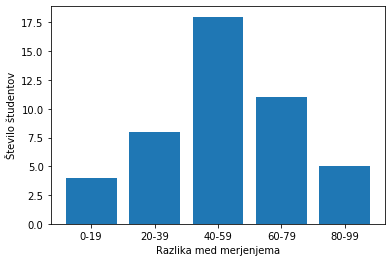

Posebej lahko pogledamo študente, ki jim je pulz med merjenjema narastel za manj kot 20:


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


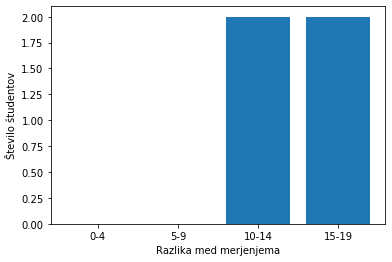

Še s tabelo: 


,VISINA,TEZA,STAROST,SPOL,KADI,ALKOHOL,VADBA,OBREMENITEV,PULZ1,PULZ2,LETO
10,170,75.0,20,1,2,1,1,1,76,88,93
57,158,51.0,18,2,2,2,2,1,68,84,96
59,180,75.0,20,1,2,1,2,1,65,82,96
72,179,80.0,20,1,2,1,2,1,145,155,97


In [45]:
razlike = abs(pulzO.PULZ1 - pulzO.PULZ2)
max_razlika = max(abs(pulzO['PULZ1'] - pulzO['PULZ2']))
print('Največja razlika med obema merjenjema je ' + str(max_razlika))
intervali = ['0-19', '20-39', '40-59', '60-79', '80-99']
l1 = len(pulzO[abs(pulzO.PULZ1 - pulzO.PULZ2) < 20])
l2 = len(pulzO[20 <= razlike][razlike < 40])
l3 = len(pulzO[40 <= razlike][razlike < 60])
l4 = len(pulzO[60 <= razlike][razlike < 80])
l5 = len(pulzO[80 <= razlike][razlike < 100])
visine = [l1, l2, l3, l4, l5]

plt.bar(intervali, visine)
plt.xlabel('Razlika med merjenjema')
plt.ylabel('Število študentov')
plt.show()
print('Posebej lahko pogledamo študente, ki jim je pulz med merjenjema narastel za manj kot 20:')
intervali2 = ['0-4', '5-9', '10-14', '15-19']
v1 = len(pulzO[abs(pulzO.PULZ1 - pulzO.PULZ2) < 5])
v2 = len(pulzO[5 <= razlike][razlike < 10])
v3 = len(pulzO[10 <= razlike][razlike < 15])
v4 = len(pulzO[15 <= razlike][razlike < 20])
visine2 = [v1, v2, v3, v4]
plt.bar(intervali2, visine2)
plt.xlabel('Razlika med merjenjema')
plt.ylabel('Število študentov')
plt.show()
print('Še s tabelo: ')
pulzO[razlike < 20]

In [58]:
print('Preizkusili bomo, ali vadba vpliva na spremembo pulza. Da bomo obravnavali vse možnosti, bomo naredili tri preizkuse.')
print('Najprej definiramo povprečja razlik med merjenjema pulzov za vsako skupino posebej.')
pr1 = abs(pulzO[pulzO.VADBA == 1]['PULZ1'] - pulzO[pulzO.VADBA == 1]['PULZ2']).mean()
pr2 = abs(pulzO[pulzO.VADBA == 2]['PULZ1'] - pulzO[pulzO.VADBA == 2]['PULZ2']).mean()
pr3 = abs(pulzO[pulzO.VADBA == 3]['PULZ1'] - pulzO[pulzO.VADBA == 3]['PULZ2']).mean()
print('Poglejmo si najprej primerjavo med 1 in 2. Ideja je, da za testno statistiko gledamo razliko pr1 - pr2. Ker je več ljudi v drugi skupini, bomo tu uporabili normalno aproksimacijo, ničelna domneva pa bo, da je povprečje te normalne porazdelitve enako pr1.')
print('Težava je v tem, da bomo v resnici posebej aproksimirali vsoto prvih merjenje in vsoto drugih. Te spremenljivke namreč niso vse medsebojno neodvisne. Recimo smiselno je privzeti, da je drugo merjenje odvisno od prvega za isto osebo.')
print('Poleg tega bomo privzeli, da sta poljubni merjenji pulza različnih oseb neodvisni.')
print('Najprej moramo dobiti šibko dosledne cenilke za varianci in kovarianco. Nato nam izrek Sluckega znova zagotovi konvergenco.')
var1_2 = ((pulzO[pulzO.VADBA == 2]['PULZ1'] - pulzO[pulzO.VADBA == 2]['PULZ1'].mean()) ** 2).sum() / (len(pulzO[pulzO.VADBA == 2]) - 1) # ocena za varianco prvega pulza v skupini 2
var2_2 = ((pulzO[pulzO.VADBA == 2]['PULZ2'] - pulzO[pulzO.VADBA == 2]['PULZ2'].mean()) ** 2).sum() / (len(pulzO[pulzO.VADBA == 2]) - 1) # ocena za varianco drugega pulza v skupini 2
cov_2 = ((pulzO[pulzO.VADBA == 2]['PULZ1'] - pulzO[pulzO.VADBA == 2]['PULZ1'].mean())*(pulzO[pulzO.VADBA == 2]['PULZ2'] - pulzO[pulzO.VADBA == 2]['PULZ2'].mean())).sum() / (len(pulzO[pulzO.VADBA == 2]) - 1) # ocena za kovarianco prvega in drugega merjenja
T = abs((pr2 - pr1) / ((var1_2 + var2_2 + 2*cov_2) ** 0.5))
print('Stopnja tveganja 0.05:')
if T <= 1.96:
    print('Ker je pri naših podatkih testna statistika enaka ' + str(T) + ', domnevo sprejmemo.')
else:
    print('Ker je pri naših podatkih testna statistika enaka ' + str(T) + ', domnevo zavrnemo.')
print('Stopnja tveganja 0.01:')
if T <=  2.575:
    print('Ker je pri naših podatkih testna statistika enaka ' + str(T) + ', domnevo sprejmemo.')
else:
    print('Ker je pri naših podatkih testna statistika enaka ' + str(T) + ', domnevo zavrnemo.')

print('Ponovimo za skupini 2 in 3.')
T = abs((pr2 - pr3) / ((var1_2 + var2_2 + 2*cov_2) ** 0.5))
print('Stopnja tveganja 0.05:')
if T <= 1.96:
    print('Ker je pri naših podatkih testna statistika enaka ' + str(T) + ', domnevo sprejmemo.')
else:
    print('Ker je pri naših podatkih testna statistika enaka ' + str(T) + ', domnevo zavrnemo.')
print('Stopnja tveganja 0.01:')
if T <=  2.575:
    print('Ker je pri naših podatkih testna statistika enaka ' + str(T) + ', domnevo sprejmemo.')
else:
    print('Ker je pri naših podatkih testna statistika enaka ' + str(T) + ', domnevo zavrnemo.')

print('Končno še za skupini 1 in 3. Tu bomo normalno aproksimacijo uporabili na tretji skupini, saj je ta večja.')
var1_3 = ((pulzO[pulzO.VADBA == 3]['PULZ1'] - pulzO[pulzO.VADBA == 3]['PULZ1'].mean()) ** 2).sum() / (len(pulzO[pulzO.VADBA == 3]) - 1) # ocena za varianco prvega pulza v skupini 2
var2_3 = ((pulzO[pulzO.VADBA == 3]['PULZ2'] - pulzO[pulzO.VADBA == 3]['PULZ2'].mean()) ** 2).sum() / (len(pulzO[pulzO.VADBA == 3]) - 1) # ocena za varianco drugega pulza v skupini 2
cov_3 = ((pulzO[pulzO.VADBA == 3]['PULZ1'] - pulzO[pulzO.VADBA == 3]['PULZ1'].mean())*(pulzO[pulzO.VADBA == 3]['PULZ2'] - pulzO[pulzO.VADBA == 3]['PULZ2'].mean())).sum() / (len(pulzO[pulzO.VADBA == 3]) - 1) # ocena za kovarianco prvega in drugega merjenja
T = abs((pr3 - pr1) / ((var1_3 + var2_3 + 2*cov_3) ** 0.5))
print('Stopnja tveganja 0.05:')
if T <= 1.96:
    print('Ker je pri naših podatkih testna statistika enaka ' + str(T) + ', domnevo sprejmemo.')
else:
    print('Ker je pri naših podatkih testna statistika enaka ' + str(T) + ', domnevo zavrnemo.')
print('Stopnja tveganja 0.01:')
if T <=  2.575:
    print('Ker je pri naših podatkih testna statistika enaka ' + str(T) + ', domnevo sprejmemo.')
else:
    print('Ker je pri naših podatkih testna statistika enaka ' + str(T) + ', domnevo zavrnemo.')

Preizkusili bomo, ali vadba vpliva na spremembo pulza. Da bomo obravnavali vse možnosti, bomo naredili tri preizkuse.
Najprej definiramo povprečja razlik med merjenjema pulzov za vsako skupino posebej.
Poglejmo si najprej primerjavo med 1 in 2. Ideja je, da za testno statistiko gledamo razliko pr1 - pr2. Ker je več ljudi v drugi skupini, bomo tu uporabili normalno aproksimacijo, ničelna domneva pa bo, da je povprečje te normalne porazdelitve enako pr1.
Težava je v tem, da bomo v resnici posebej aproksimirali vsoto prvih merjenje in vsoto drugih. Te spremenljivke namreč niso vse medsebojno neodvisne. Recimo smiselno je privzeti, da je drugo merjenje odvisno od prvega za isto osebo.
Poleg tega bomo privzeli, da sta poljubni merjenji pulza različnih oseb neodvisni.
Najprej moramo dobiti šibko dosledne cenilke za varianci in kovarianco. Nato nam izrek Sluckega znova zagotovi konvergenco.
Stopnja tveganja 0.05:
Ker je pri naših podatkih testna statistika enaka 0.07035663802221113, domnevo s

In [67]:
print('Naredimo test še z analizo variance. Pri tem bomo predpostavili, da so meritve oblike Y_ij = mi + alfa_i + epsilon_ij, kjer epsilon_ij neodvisno normalno porazdeljeni s pričakovano vrednostjo 0 in varianco sigma^2.')
print('Tokrat je ničelna domneva ta, da so povprečja sprememb pulzov v vseh treh primerih enaka. Alternativna domneva pa je, da se vsaj dve povprečji razlikujeta.')
I = 3
J1 = len(pulzO[pulzO.VADBA == 1])
J2 = len(pulzO[pulzO.VADBA == 2])
J3 = len(pulzO[pulzO.VADBA == 3])
m = I - 1
n = J1 - 1 + J2 - 1 + J3 - 1
SS_w = ((abs(pulzO[pulzO.VADBA == 1]['PULZ2'] - pulzO[pulzO.VADBA == 1]['PULZ1']) - pr1) ** 2).sum() + ((abs(pulzO[pulzO.VADBA == 2]['PULZ2'] - pulzO[pulzO.VADBA == 2]['PULZ1']) - pr2) ** 2).sum() + ((abs(pulzO[pulzO.VADBA == 3]['PULZ2'] - pulzO[pulzO.VADBA == 3]['PULZ1']) - pr3) ** 2).sum()
SS_b = J1*((pr1 - abs(pulzO['PULZ2'] - pulzO['PULZ1']).mean()) ** 2) + J2*((pr2 - abs(pulzO['PULZ2'] - pulzO['PULZ1']).mean()) ** 2) + J3*((pr3 - abs(pulzO['PULZ2'] - pulzO['PULZ1']).mean()) ** 2)

F = (SS_b / m) / (SS_w / n)
print('Stopnja tveganja 0.05:')
if F <= 3.23:
    print('Ker je F = ' + str(F) + ', domnevo sprejmemo.')
else:
    print('Ker je F = ' + str(F) + ', domnevo zavrnemo.')
print('Stopnja tveganja 0.01:')
if F <= 5.18:
    print('Ker je F = ' + str(F) + ', domnevo sprejmemo.')
else:
    print('Ker je F = ' + str(F) + ', domnevo zavrnemo.')

Naredimo test še z analizo variance. Pri tem bomo predpostavili, da so meritve oblike Y_ij = mi + alfa_i + epsilon_ij, kjer epsilon_ij neodvisno normalno porazdeljeni s pričakovano vrednostjo 0 in varianco sigma^2.
Tokrat je ničelna domneva ta, da so povprečja sprememb pulzov v vseh treh primerih enaka. Alternativna domneva pa je, da se vsaj dve povprečji razlikujeta.
Stopnja tveganja 0.05:
Ker je F = 0.09837114039606573, domnevo sprejmemo.
Stopnja tveganja 0.01:
Ker je F = 0.09837114039606573, domnevo sprejmemo.
